In [1]:
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM
import time
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
from rmgpy import settings

In [3]:
settings


{'database.directory': '/Users/rwest/Code/RMG-database/input',
 'test_data.directory': '/Users/rwest/Code/RMG-Py/rmgpy/test_data'}

In [4]:
database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = ['Klippenstein_Glarborg2016', 'BurkeH2O2', 'thermo_DFT_CCSDTF12_BAC', 
                               'DFT_QCI_thermo',
                           'primaryThermoLibrary', 'primaryNS', 'NitrogenCurran', 'NOx2018', 'FFCM1(-)',
'SulfurLibrary', 'SulfurGlarborgH2S','SABIC_aromatics'],
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = 'all',
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


In [5]:
family = database.kinetics.families["Singlet_Carbene_Intra_Disproportionation"]


In [6]:
family.clean_tree()

In [7]:
start = time.time()
family.generate_tree(thermo_database=database.thermo,
                     nprocs=1,
                     new_fraction_threshold_to_reopt_node=0.25,
                     max_batch_size=800,
                     extension_iter_max=2,
                     extension_iter_item_cap=100)

end = time.time()
print(end-start)

ERROR:root:4.0
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early


1.532015085220337


In [8]:
len(family.groups.entries)

7

In [9]:
family.groups.entries

{'CH_C_unsaturated': <Entry index=-1 label="CH_C_unsaturated">,
 'Root': <Entry index=0 label="Root">,
 'Root_Ext-3C-R_Ext-4R!H-R_Sp-4R!H-1C': <Entry index=1 label="Root_Ext-3C-R_Ext-4R!H-R_Sp-4R!H-1C">,
 'Root_Ext-3C-R_Ext-4R!H-R_N-Sp-4R!H-1C': <Entry index=2 label="Root_Ext-3C-R_Ext-4R!H-R_N-Sp-4R!H-1C">,
 'Root_Ext-3C-R_Ext-4R!H-R_Sp-4R!H-1C_Ext-4R!H-R_Ext-4R!H-R': <Entry index=3 label="Root_Ext-3C-R_Ext-4R!H-R_Sp-4R!H-1C_Ext-4R!H-R_Ext-4R!H-R">,
 'Root_Ext-3C-R_Ext-4R!H-R_N-Sp-4R!H-1C_Ext-4R!H-R_Ext-5R!H-R_Ext-5R!H-R_Sp-6R!H-5R!H': <Entry index=4 label="Root_Ext-3C-R_Ext-4R!H-R_N-Sp-4R!H-1C_Ext-4R!H-R_Ext-5R!H-R_Ext-5R!H-R_Sp-6R!H-5R!H">,
 'Root_Ext-3C-R_Ext-4R!H-R_N-Sp-4R!H-1C_Ext-4R!H-R_Ext-5R!H-R_Ext-5R!H-R_N-Sp-6R!H-5R!H': <Entry index=5 label="Root_Ext-3C-R_Ext-4R!H-R_N-Sp-4R!H-1C_Ext-4R!H-R_Ext-5R!H-R_Ext-5R!H-R_N-Sp-6R!H-5R!H">}

In [10]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.0001678466796875


In [11]:
start = time.time()
family.regularize(thermo_database=database.thermo)
end = time.time()
print(end-start)

0.15448403358459473


In [12]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

0.13861083984375


In [13]:
len(templateRxnMap)

7

In [14]:
family.clean_tree_rules()

In [15]:
start = time.time()
family.make_bm_rules_from_template_rxn_map(templateRxnMap)#,nprocs=6)
end = time.time()
print(end-start)

/Users/rwest/opt/anaconda3/envs/rmgob3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/rwest/opt/anaconda3/envs/rmgob3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/rwest/opt/anaconda3/envs/rmgob3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.1289069652557373


In [16]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.0006499290466308594


In [17]:
start = time.time()
errors,uncertainties = family.cross_validate(iters=0,random_state=5,folds=0,ascend=False)
end = time.time()
print(end-start)

0.1482410430908203


In [18]:
errors.values()

dict_values([0.8030503753389733, -4.248161301929277, -4.132982285531742, 4.255787692441988])

Text(0.5, 0, '$|Ln(k_{est}/k_{rxn})|$')

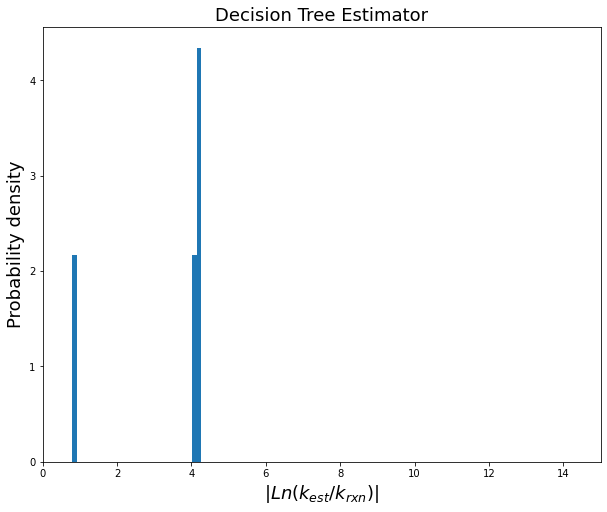

In [19]:
plt.figure(figsize=(10,8))
plt.hist(np.abs(list(errors.values())),bins=30, density=True)
plt.title('Decision Tree Estimator',fontsize=18)
#plt.ylim(0,.4)
plt.xlim(0,15)
plt.ylabel('Probability density',fontsize=18)
plt.xlabel(r'$|Ln(k_{est}/k_{rxn})|$',fontsize=18)

In [20]:
#family.save('/Users/mattjohnson/RMGCODE/RMG-database/input/kinetics/families/')

In [21]:
save_path = os.path.join(settings['database.directory'], 'kinetics', 'families', family.name)
print(save_path)

/Users/rwest/Code/RMG-database/input/kinetics/families/Singlet_Carbene_Intra_Disproportionation


In [22]:
family.save(save_path)